# Problem Statement
The bank customer churn dataset is a dataset that contains information about customers who have either stayed with or left a bank. The problem statement for this dataset is to predict which customers are likely to leave the bank based on the given features, so that the bank can take proactive measures to retain these customers.

The dataset contains various customer attributes such as age, gender, credit score, balance, tenure, number of products, etc.It also contains information about the customer's relationship with the bank, such as whether they have a credit card, whether they are active users of the bank's mobile app, whether they have taken a loan, etc. The target variable in this dataset is whether the customer has churned or not.

The problem statement requires building a classification model that can predict whether a customer is likely to churn or not. This can help the bank in identifying customers who are at a high risk of leaving, and taking appropriate measures to retain them.


# Importing Libraries
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## importing the dataset
df=pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
## total rows and cols
df.shape

(10000, 12)

In [ ]:
##Size of dataset
df.size

120000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
## count: the number of non-null values in the column
## mean: the arithmetic mean (average) of the column
## std: the standard deviation of the column
## min: the minimum value in the column
## 25%: the first quartile of the column (25th percentile)
## 50%: the median of the column (50th percentile)
## 75%: the third quartile of the column (75th percentile)
## max: the maximum value in the column

df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
##The "customer_id" column typically contains a unique identifier for each customer.
## This information may not be relevant for the analysis or prediction of customer churn
df = df.drop(['customer_id'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
##removing the duplicates if any
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
df.nunique()

credit_score         460
country                3
gender                 2
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
churn                  2
dtype: int64

In [ ]:
class Dummy_Transformer(object):
    
    def fit(self, X, y=None):
        self.keys = set(X)
    
    def transform(self, X, y=None):
        res = {}
        for key in self.keys:   # code takes a list of categorical variables X and converts it into a one-hot encoded Pandas DataFrame.
  # it creates an empty dictionary res with keys as unique categorical values present in the X and corresponding values as a list of zeros with the length equal to the length of X
  #  it loops through the X and for each value item in X, if it's present in the keys of res, it sets the corresponding value in the res dictionary to 1 for the ith index.
            res[key] = [0]*len(X)    
        for i, item in enumerate(X):
            if item in self.keys:
                res[item][i] = 1
        return pd.DataFrame(res)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)  
dummytf = Dummy_Transformer()

In [ ]:
def label_encoder(columns):
    """
    Encode categorical variable into numerical values.
    
    Args:
    column: pandas Series object containing categorical values
    
    Returns:
    encoded: pandas Series object containing numerical values
    """
    # Create a dictionary to map categorical values to numerical values
    unique_values = columns.unique()
    encoding_dict = {value: i for i, value in enumerate(unique_values)}
    
    # Use the dictionary to encode the categorical values
    encoded = columns.map(encoding_dict)
    
    return encoded

In [ ]:
frames = [df,dummytf.fit_transform(df.country)]
dfNew=pd.concat(frames,axis=1,join='inner')

# define label encoder for "gender" column
gender_encoder = {'Female': 0, 'Male': 1}
dfNew["gender"] = dfNew["gender"].map(gender_encoder)

# define columns and move the "churn" column to the end
columns = list(dfNew)
columns.insert(900, columns.pop(columns.index('churn')))  #insert() method is used to insert the 'churn' column at index 900 of the list of columns
dfNew = dfNew.loc[:, columns]             # loc[] method is used to reorder the columns of the df.

dfNum=dfNew.drop('country',axis=1)
dfNum

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Spain,Germany,churn
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,0,1,1


<Axes: >

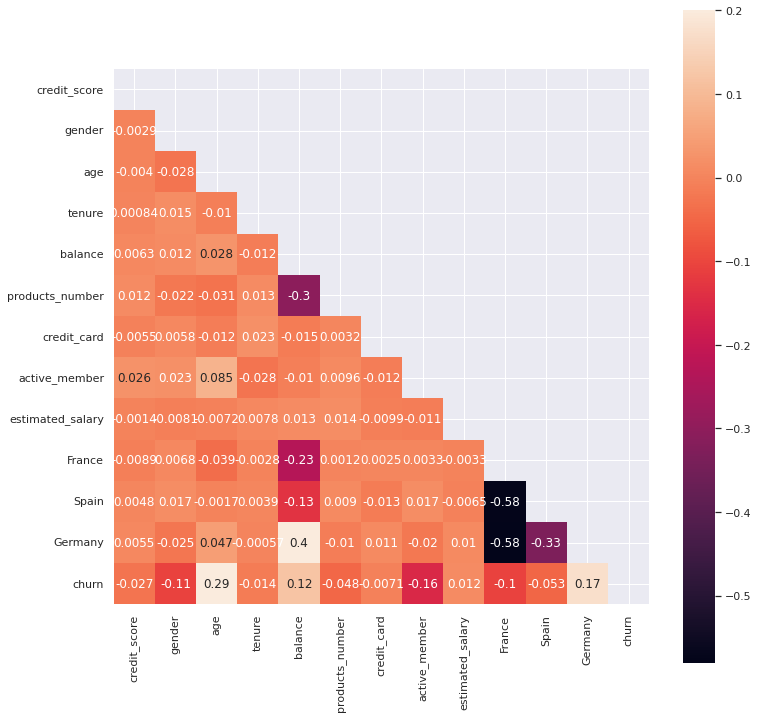

In [ ]:
train_corr = dfNum.corr(method = 'pearson')      ## corr() method is used to compute the correlation matrix for the numeric columns in the df.
mask = np.zeros_like(train_corr)   # mask is created with the same shape as the correlation matrix, initialized with zeros. 
                                   # Then, the triu_indices_from() method is used to get the indices of the upper triangle of the matrix
mask[np.triu_indices_from(mask)] = True
#>>> with sns.axes_style("white"):
plt.figure(figsize=(12,12))
corrHeat = sns.heatmap(train_corr, mask=mask, annot=True,vmax=.2, square=True)  # annot parameter is set to True to display the correlation coefficients .
corrHeat

**Findings:**

All the correlation coefficients between the factors and outcome of churn are small.
But of all these factors, five factors (gender, age, balance, activeMember,country) show relative strong correlation with the outcome of churn.

In [ ]:
#gender with country vs churn

# used to group rows of data based on one or more columns, and then apply aggregate functions such as sum, count, max, min, or average to each group.

by_gender_country = df.groupby(['country', 'gender'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('country')
by_gender_country

,country,gender,churn,ratio
0,France,Female,0,0.796550
1,France,Female,1,0.203450
2,France,Male,0,0.872866
3,France,Male,1,0.127134
4,Germany,Female,0,0.624476
5,Germany,Female,1,0.375524
6,Germany,Male,0,0.721884
7,Germany,Male,1,0.278116
8,Spain,Female,0,0.787879
9,Spain,Female,1,0.212121


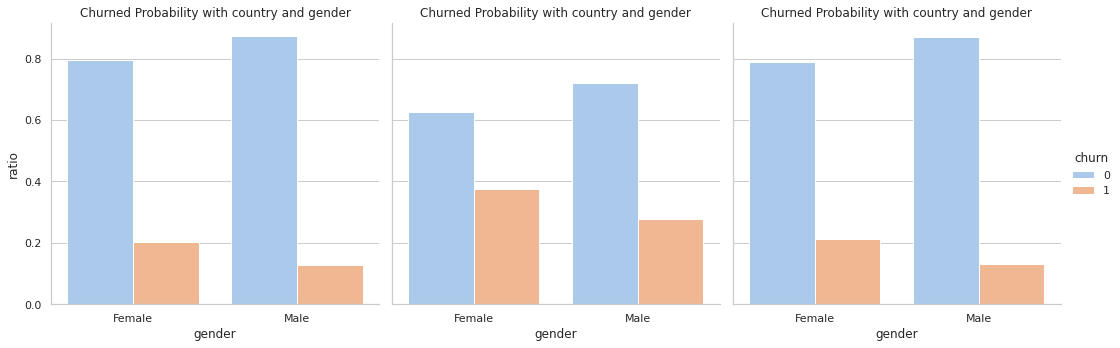

In [ ]:
## x parameter specifies the categorical variable to plot on the x-axis (gender), the y parameter specifies the numeric variable to plot on the y-axis (ratio), 
## and the hue parameter specifies the categorical variable to group the data by and plot separate bars for (churn).
## The col parameter is used to create separate plots for each level of a categorical variable (country), and the kind parameter specifies the type of plot to create (bar).

sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.catplot(x='gender',y='ratio', hue='churn', col='country', kind='bar', data=by_gender_country).set(title = 'Churned Probability with country and gender')

**Findings**

German women have churn rate is 6:4

For German males, churn rate is 7:3

In [ ]:
by_age = df.groupby(['age'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'ratio'}).reset_index().sort_values('age')
by_age

,age,churn,ratio
0,18,0,0.909091
1,18,1,0.090909
2,19,0,0.962963
3,19,1,0.037037
4,20,0,0.950000
...,...,...,...
123,84,0,0.500000
124,84,1,0.500000
125,85,0,1.000000
126,88,0,1.000000


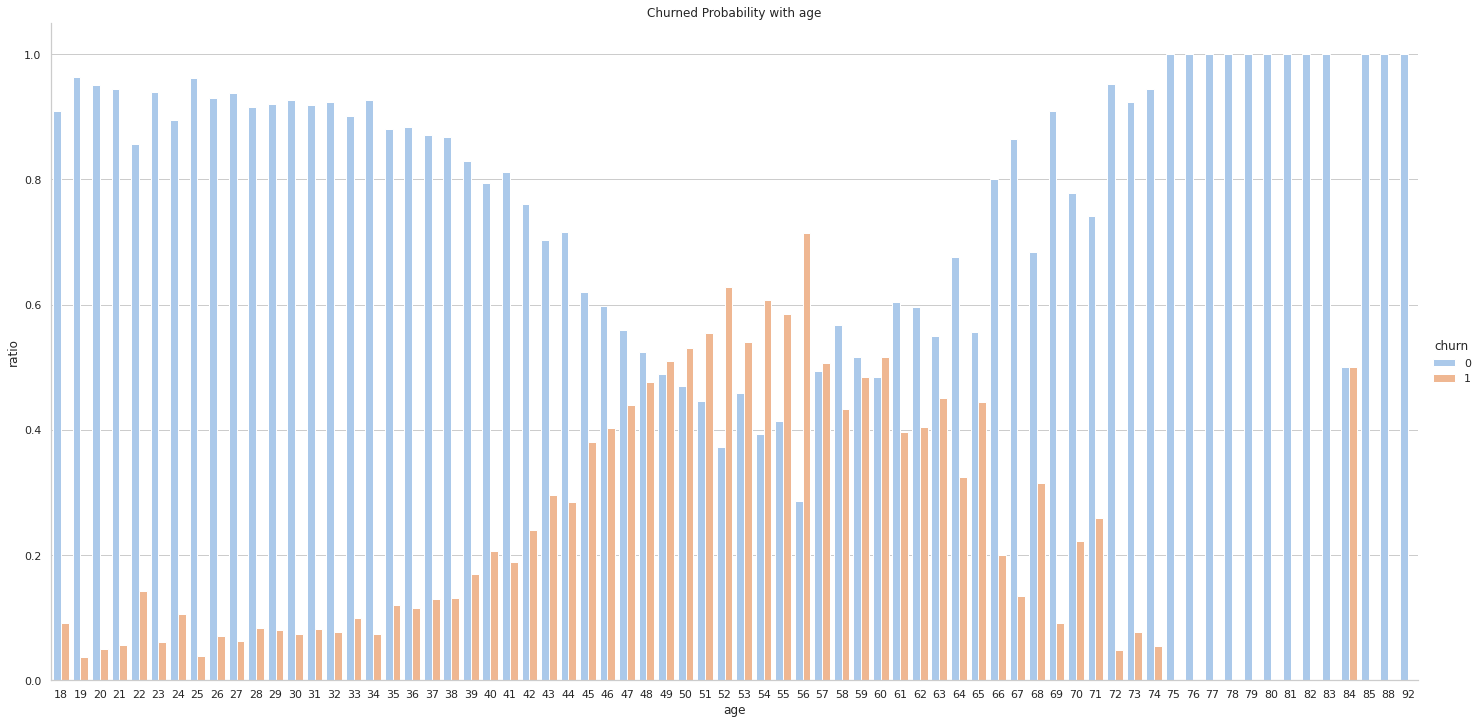

In [ ]:
# visualization of the relationship between age, churn, and churn probability in a bank churn prediction model.
sns.set_theme(style="whitegrid", color_codes=True,context='notebook',palette='pastel')
sns.catplot(x='age',y='ratio', hue='churn',  kind='bar', data=by_age,height=10,aspect=2).set(title = 'Churned Probability with age')

<Figure size 360x216 with 0 Axes>

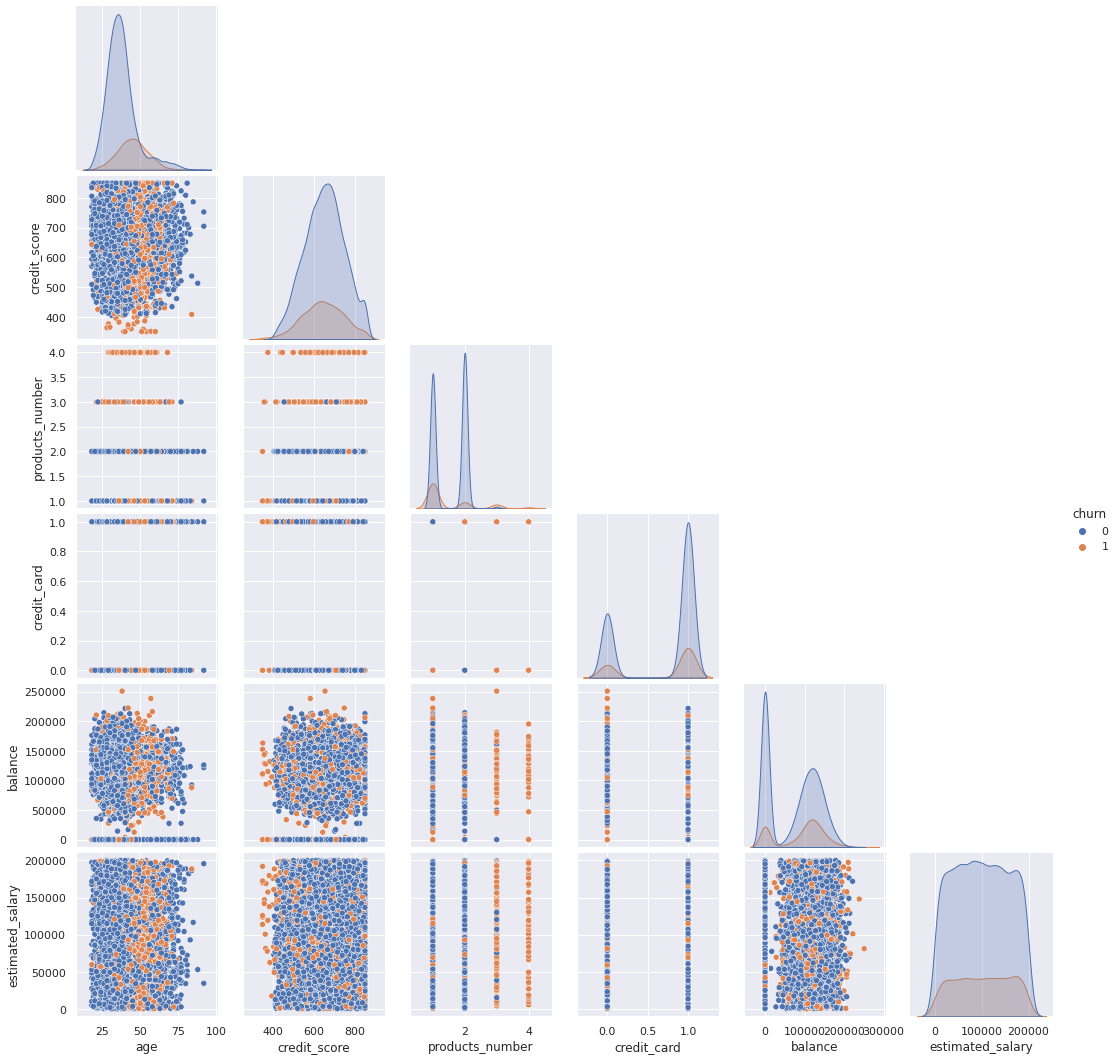

In [ ]:
#age,credit_score,products_number,credit_card,balance, vs churn
sns.set_theme()
plt.figure(figsize=(5,3))
sns.pairplot(data=df[["age","credit_score","products_number","credit_card","balance",'estimated_salary',"churn"]],hue='churn',corner=True)
plt.show()

**Findings：**

product number has obvious pointers ➡️ analyzed below.

Age has a significant impact on churn results

People with a balance over 20w who do not yet have a credit card will be more likely to churn

People with low credit scores (under400) will like to churn regardless of their balance, whether they have a credit card or not, and whether their salary is high or low.

In [ ]:
df[df['products_number']==3].products_number.count()

266

In [ ]:
#train_test_split
def train_test_split(X, y, test_size=0.2, random_state=None):

    # Check if input arrays have the same length
    assert len(X) == len(y)

    # Shuffle the data
    if random_state is not None:
        np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    X_shuffled = X.iloc[shuffled_indices]
    y_shuffled = y.iloc[shuffled_indices]
    
    # Calculate the number of instances in the test subset
    n_test = int(len(X) * test_size)
    
    # Split the data
    X_train = X_shuffled[:-n_test]
    X_test = X_shuffled[-n_test:]
    y_train = y_shuffled[:-n_test]
    y_test = y_shuffled[-n_test:]
    
    return X_train, X_test, y_train, y_test

In [ ]:
features = list(dfNum.columns)
target = "churn"
features.remove(target)

X = dfNum[features]
y = dfNum[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(7000, 12)
(3000, 12)


In [ ]:
## Model building for rfc without using sklearn library

import numpy as np
from collections import Counter    ## Counter class from the collections module is a useful tool for counting the frequency of elements in a list or any other iterable.

class Node:
  ##the feature, threshold, left, and right parameters define an internal node, and the value parameter defines a leaf node.
  ## The * before the value parameter indicates that it is a keyword-only argument, which means it can only be passed using its name.
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None): ## init is a method used to initialise the obj of a class.
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
 ## is_leaf_node is a member function of a class.is_leaf_node method is used to check if a particular node is a leaf node or not.
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

##fit is a member function of a class. x--i/pfeatures, y--target var
    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

##The _grow_tree method is a recursive method that creates the decision tree by splitting the input data at each node based on the selected feature and threshold
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)     ##np.random.choice() is a func from the NumPy lib that randomly selects a specified no.of items

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


##_best_split that takes in an input dataset X, a target variable y, and a set of feature indices feat_idxs. 
##The purpose of this method is to find the best split point among all the candidate features and thresholds for a given set of features,
  
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:  ##feat_idxs is a numerical position of each of these feature in dataset
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


### method _information_gain that takes in a target variable y, a feature column X_column, and a threshold value.
## The purpose of this method is to calculate the information gain of a given split point based on the entropy of the parent node and the weighted average entropy of the child nodes.

  
    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        ##the method splits the data into left and right child nodes based on the specified threshold. 
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        ##Finally, the method calculates the information gain as the difference between the parent entropy and the child entropy.  
        information_gain = parent_entropy - child_entropy
        return information_gain

## The method first uses NumPy's argwhere function to find the indices of the samples in X_column that are less than or equal to the split threshold.
## The flatten method is then used to convert the resulting 2D array of indices to a 1D array.
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)  ##bincount function to count the number of occurrences of each class label in y.
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [ ]:
import numpy as np
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_features=None):   ## initializes the hyperparameters of the random forest classifier
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_features
        self.trees = []

    def fit(self, X, y):   ##  This method is used to train the random forest classifier. It creates a list of decision trees by calling the DecisionTree class, 
                                #then fits each decision tree on a bootstrapped sample of the training data.
                              # The number of trees to be created is defined by the n_trees hyperparameter
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):  ## It takes in the training data X and corresponding labels y, and returns a bootstrapped sample of the same size as the original data
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):  ## takes in an array of labels y and returns the most commonly occurring label.
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):  ##used to make predictions on new data
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [ ]:
clf = RandomForest(n_trees=100,max_depth=5,n_features=5)
clf.fit(X_train.values,y_train.values.ravel())

# Make predictions on the test data
y_pred = clf.predict(X_test.values)

In [ ]:
def accuracy_score(y_true, y_pred): ## computes the accuracy of a set of predictions
    correct = 0
    for i in range(len(y_true)):           ## y_true---true labels, y_pred---predicted labels
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [ ]:
## checking accuracy_score

accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8566666666666667


In [ ]:
## CONFUSION METRICS:
# if the cost of false positives is high (e.g., offering a promotion to a customer who is likely to churn), precision may be the most important metric to optimize.
#  Conversely, if the cost of false negatives is high (e.g., losing a valuable customer), recall may be the most important metric to optimize.

def confusion_matrix(y_true, y_pred):
    """
    Compute the confusion matrix for a binary classifier.

    Args:
    y_true: a numpy array of the true class labels (0 or 1)
    y_pred: a numpy array of the predicted class labels (0 or 1)

    Returns:
    confusion_matrix: a 2x2 numpy array containing the counts of true positives, false positives,
                      true negatives, and false negatives, in that order
    """
    true_positives = ((y_true == 1) & (y_pred == 1)).sum()  # actually positive and predicted to be positive.
    false_positives = ((y_true == 0) & (y_pred == 1)).sum()  #  actually negative but predicted to be positive.
    true_negatives = ((y_true == 0) & (y_pred == 0)).sum()  ## actually negative and predicted to be negative.
    false_negatives = ((y_true == 1) & (y_pred == 0)).sum() ## actually positive but predicted to be negative.

    confusion_matrix = np.array([[true_positives, false_positives], [false_negatives, true_negatives]])

    return confusion_matrix

In [ ]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([1, 0, 1])
clf.fit(X, y)

# make predictions
y_pred = clf.predict(X)

# compute the confusion matrix
confusion_matrix = confusion_matrix(y, y_pred)

In [ ]:
print(confusion_matrix)

[[2 0]
 [0 1]]


In [ ]:
## HYPER PARAMETER TUNING :

def grid_search(X_train, y_train, X_test, y_test):
    # define hyperparameter ranges
    n_trees_range = [10, 50, 100]
    max_depth_range = [10, 20, 30]
    min_samples_split_range = [2, 4, 6]
    min_samples_leaf_range = [1, 2, 4]

    # initialize variables for optimal hyperparameters and accuracy
    best_n_trees = None
    best_max_depth = None
    best_min_samples_split = None
    best_min_samples_leaf = None
    best_accuracy = 0

def train_rfc(X_train, y_train, n_trees, max_depth, min_samples_split, min_samples_leaf):
    rfc = RandomForestClassifier(n_estimators=n_trees, max_depth=max_depth, 
                                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    return accuracy
    
    # perform grid search
    for n_trees in n_trees_range:
        for max_depth in max_depth_range:
            for min_samples_split in min_samples_split_range:
                for min_samples_leaf in min_samples_leaf_range:
                    accuracy = train_rfc(X_train, y_train, X_test, y_test, n_trees, max_depth, min_samples_split, min_samples_leaf)
                    if accuracy > best_accuracy:
                        best_n_trees = n_trees
                        best_max_depth = max_depth
                        best_min_samples_split = min_samples_split
                        best_min_samples_leaf = min_samples_leaf
                        best_accuracy = accuracy

    # return optimal hyperparameters
    return best_n_trees, best_max_depth, best_min_samples_split, best_min_samples_leaf

# Generate some data
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=10, n_redundant=5,
                           random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest Classifier
rfc = RandomForestClassifier()

# Perform grid search using 5-fold cross validation
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
rfc = RandomForest(n_trees=200,max_depth=20,n_features=20)
rfc.fit(X_train.values,y_train.values.ravel())

# Make predictions on the test data
y_pred = rfc.predict(X_test.values)

In [ ]:
def accuracy_score(y_true, y_pred): ## computes the accuracy of a set of predictions
    correct = 0
    for i in range(len(y_true)):           ## y_true---true labels, y_pred---predicted labels
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [ ]:
## checking accuracy_score

accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8543333333333333
